In [1]:
import torch
import dgl
import networkx as nx
import matplotlib.pyplot as plt

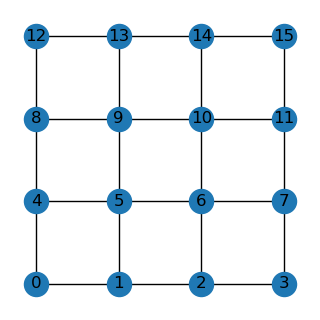

In [2]:
g = nx.grid_2d_graph(4,4)
nx.set_node_attributes(g, {node: (node[1], node[0]) for node in g.nodes}, 'pos')
g = nx.convert_node_labels_to_integers(g)
plt.figure(figsize=(3,3))
nx.draw(g, pos=nx.get_node_attributes(g, 'pos'), with_labels=True)

In [3]:
g = nx.grid_2d_graph(4,4)
g = nx.convert_node_labels_to_integers(g)
d = dgl.from_networkx(g)
d.ndata['h'] = torch.ones(d.num_nodes())
d.edata['e'] = torch.zeros(d.num_edges())

In [4]:
# d.update_all(dgl.function.copy_u('h', out='m'), dgl.function.sum(msg='m', out='h'))

def msg_func(edges):
    print(edges.src['h'].size(), edges.dst['h'].size())
    return {'m': edges.src['h']}
def reduce_func(nodes):
    print(nodes.mailbox['m'].size(), nodes.mailbox['m'])
    return {'h': torch.sum(nodes.mailbox['m'], 1)}
d.update_all(msg_func, reduce_func)

torch.Size([48]) torch.Size([48])
torch.Size([4, 2]) tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])
torch.Size([8, 3]) tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
torch.Size([4, 4]) tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


In [15]:
# d.update_all(dgl.function.copy_u('h', out='m'), dgl.function.sum(msg='m', out='h'))

d.update_all(dgl.function.copy_u('h', out='m'), dgl.function.sum(msg='m', out='h'))

In [16]:
t

NameError: name 't' is not defined

In [162]:
d.cpu()

Graph(num_nodes=16, num_edges=48,
      ndata_schemes={'h': Scheme(shape=(), dtype=torch.float32)}
      edata_schemes={'e': Scheme(shape=(), dtype=torch.float32)})

In [112]:
edges = list(zip(*edges))

In [114]:
nx.set_edge_attributes(g, dict(zip(edges, data)), 'ss')

In [117]:
g = d
nx_graph = g.to_networkx()
print(g.edges())
print(nx_graph.edges())
for nfeat, data in g.ndata.items():
    nx.set_node_attributes(nx_graph, dict(zip(range(g.number_of_nodes()), data.numpy())), nfeat)
print(nx_graph.edges())


(tensor([ 0,  0,  1,  1,  1,  2,  2,  2,  3,  3,  4,  4,  4,  5,  5,  5,  5,  6,
         6,  6,  6,  7,  7,  7,  8,  8,  8,  9,  9,  9,  9, 10, 10, 10, 10, 11,
        11, 11, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15]), tensor([ 4,  1,  0,  5,  2,  1,  6,  3,  2,  7,  0,  8,  5,  1,  4,  9,  6,  2,
         5, 10,  7,  3,  6, 11,  4, 12,  9,  5,  8, 13, 10,  6,  9, 14, 11,  7,
        10, 15,  8, 13,  9, 12, 14, 10, 13, 15, 11, 14]))
[(0, 4), (0, 1), (1, 0), (1, 5), (1, 2), (2, 1), (2, 6), (2, 3), (3, 2), (3, 7), (4, 0), (4, 8), (4, 5), (5, 1), (5, 4), (5, 9), (5, 6), (6, 2), (6, 5), (6, 10), (6, 7), (7, 3), (7, 6), (7, 11), (8, 4), (8, 12), (8, 9), (9, 5), (9, 8), (9, 13), (9, 10), (10, 6), (10, 9), (10, 14), (10, 11), (11, 7), (11, 10), (11, 15), (12, 8), (12, 13), (13, 9), (13, 12), (13, 14), (14, 10), (14, 13), (14, 15), (15, 11), (15, 14)]
[(0, 4), (0, 1), (1, 0), (1, 5), (1, 2), (2, 1), (2, 6), (2, 3), (3, 2), (3, 7), (4, 0), (4, 8), (4, 5), (5, 1), (5, 4), (5, 9), (5, 6), (6, 2),

In [119]:
nx_graph.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15))

In [120]:

edges = list(zip(*torch.stack(g.edges()).numpy()))  # size (num_edges, 2)


In [122]:

for efeat, data in g.edata.items():
    print( dict(zip(edges, data.numpy())))
    # nx.set_edge_attributes(nx_graph, dict(zip(edges, data.numpy())), efeat)
# nx_graph = nx_graph.to_undirected()


{(0, 4): 0.0, (0, 1): 0.0, (1, 0): 0.0, (1, 5): 0.0, (1, 2): 0.0, (2, 1): 0.0, (2, 6): 0.0, (2, 3): 0.0, (3, 2): 0.0, (3, 7): 0.0, (4, 0): 0.0, (4, 8): 0.0, (4, 5): 0.0, (5, 1): 0.0, (5, 4): 0.0, (5, 9): 0.0, (5, 6): 0.0, (6, 2): 0.0, (6, 5): 0.0, (6, 10): 0.0, (6, 7): 0.0, (7, 3): 0.0, (7, 6): 0.0, (7, 11): 0.0, (8, 4): 0.0, (8, 12): 0.0, (8, 9): 0.0, (9, 5): 0.0, (9, 8): 0.0, (9, 13): 0.0, (9, 10): 0.0, (10, 6): 0.0, (10, 9): 0.0, (10, 14): 0.0, (10, 11): 0.0, (11, 7): 0.0, (11, 10): 0.0, (11, 15): 0.0, (12, 8): 0.0, (12, 13): 0.0, (13, 9): 0.0, (13, 12): 0.0, (13, 14): 0.0, (14, 10): 0.0, (14, 13): 0.0, (14, 15): 0.0, (15, 11): 0.0, (15, 14): 0.0}


In [146]:
gg = nx.Graph()

OutMultiEdgeDataView([(0, 4, {'id': 0, 'weight': dict_items([((0, 4), 0.0), ((0, 1), 0.0), ((1, 0), 0.0), ((1, 5), 0.0), ((1, 2), 0.0), ((2, 1), 0.0), ((2, 6), 0.0), ((2, 3), 0.0), ((3, 2), 0.0), ((3, 7), 0.0), ((4, 0), 0.0), ((4, 8), 0.0), ((4, 5), 0.0), ((5, 1), 0.0), ((5, 4), 0.0), ((5, 9), 0.0), ((5, 6), 0.0), ((6, 2), 0.0), ((6, 5), 0.0), ((6, 10), 0.0), ((6, 7), 0.0), ((7, 3), 0.0), ((7, 6), 0.0), ((7, 11), 0.0), ((8, 4), 0.0), ((8, 12), 0.0), ((8, 9), 0.0), ((9, 5), 0.0), ((9, 8), 0.0), ((9, 13), 0.0), ((9, 10), 0.0), ((10, 6), 0.0), ((10, 9), 0.0), ((10, 14), 0.0), ((10, 11), 0.0), ((11, 7), 0.0), ((11, 10), 0.0), ((11, 15), 0.0), ((12, 8), 0.0), ((12, 13), 0.0), ((13, 9), 0.0), ((13, 12), 0.0), ((13, 14), 0.0), ((14, 10), 0.0), ((14, 13), 0.0), ((14, 15), 0.0), ((15, 11), 0.0), ((15, 14), 0.0)])}), (0, 1, {'id': 1, 'weight': dict_items([((0, 4), 0.0), ((0, 1), 0.0), ((1, 0), 0.0), ((1, 5), 0.0), ((1, 2), 0.0), ((2, 1), 0.0), ((2, 6), 0.0), ((2, 3), 0.0), ((3, 2), 0.0), ((3, 7)

In [141]:
nx.set_edge_attributes(nx_graph, dict(zip(edges, data.tolist())), 'weight')

ValueError: not enough values to unpack (expected 3, got 2)

In [143]:
nx.get_edge_attributes(nx_graph,'weight')


{(0,
  4,
  0): dict_items([((0, 4), 0.0), ((0, 1), 0.0), ((1, 0), 0.0), ((1, 5), 0.0), ((1, 2), 0.0), ((2, 1), 0.0), ((2, 6), 0.0), ((2, 3), 0.0), ((3, 2), 0.0), ((3, 7), 0.0), ((4, 0), 0.0), ((4, 8), 0.0), ((4, 5), 0.0), ((5, 1), 0.0), ((5, 4), 0.0), ((5, 9), 0.0), ((5, 6), 0.0), ((6, 2), 0.0), ((6, 5), 0.0), ((6, 10), 0.0), ((6, 7), 0.0), ((7, 3), 0.0), ((7, 6), 0.0), ((7, 11), 0.0), ((8, 4), 0.0), ((8, 12), 0.0), ((8, 9), 0.0), ((9, 5), 0.0), ((9, 8), 0.0), ((9, 13), 0.0), ((9, 10), 0.0), ((10, 6), 0.0), ((10, 9), 0.0), ((10, 14), 0.0), ((10, 11), 0.0), ((11, 7), 0.0), ((11, 10), 0.0), ((11, 15), 0.0), ((12, 8), 0.0), ((12, 13), 0.0), ((13, 9), 0.0), ((13, 12), 0.0), ((13, 14), 0.0), ((14, 10), 0.0), ((14, 13), 0.0), ((14, 15), 0.0), ((15, 11), 0.0), ((15, 14), 0.0)]),
 (0,
  1,
  0): dict_items([((0, 4), 0.0), ((0, 1), 0.0), ((1, 0), 0.0), ((1, 5), 0.0), ((1, 2), 0.0), ((2, 1), 0.0), ((2, 6), 0.0), ((2, 3), 0.0), ((3, 2), 0.0), ((3, 7), 0.0), ((4, 0), 0.0), ((4, 8), 0.0), ((4, 5),

In [139]:
dict(zip(edges, data.tolist()))

{(0, 4): 0.0,
 (0, 1): 0.0,
 (1, 0): 0.0,
 (1, 5): 0.0,
 (1, 2): 0.0,
 (2, 1): 0.0,
 (2, 6): 0.0,
 (2, 3): 0.0,
 (3, 2): 0.0,
 (3, 7): 0.0,
 (4, 0): 0.0,
 (4, 8): 0.0,
 (4, 5): 0.0,
 (5, 1): 0.0,
 (5, 4): 0.0,
 (5, 9): 0.0,
 (5, 6): 0.0,
 (6, 2): 0.0,
 (6, 5): 0.0,
 (6, 10): 0.0,
 (6, 7): 0.0,
 (7, 3): 0.0,
 (7, 6): 0.0,
 (7, 11): 0.0,
 (8, 4): 0.0,
 (8, 12): 0.0,
 (8, 9): 0.0,
 (9, 5): 0.0,
 (9, 8): 0.0,
 (9, 13): 0.0,
 (9, 10): 0.0,
 (10, 6): 0.0,
 (10, 9): 0.0,
 (10, 14): 0.0,
 (10, 11): 0.0,
 (11, 7): 0.0,
 (11, 10): 0.0,
 (11, 15): 0.0,
 (12, 8): 0.0,
 (12, 13): 0.0,
 (13, 9): 0.0,
 (13, 12): 0.0,
 (13, 14): 0.0,
 (14, 10): 0.0,
 (14, 13): 0.0,
 (14, 15): 0.0,
 (15, 11): 0.0,
 (15, 14): 0.0}

In [140]:
nx_graph.edges()

OutMultiEdgeDataView([(0, 4), (0, 1), (1, 0), (1, 5), (1, 2), (2, 1), (2, 6), (2, 3), (3, 2), (3, 7), (4, 0), (4, 8), (4, 5), (5, 1), (5, 4), (5, 9), (5, 6), (6, 2), (6, 5), (6, 10), (6, 7), (7, 3), (7, 6), (7, 11), (8, 4), (8, 12), (8, 9), (9, 5), (9, 8), (9, 13), (9, 10), (10, 6), (10, 9), (10, 14), (10, 11), (11, 7), (11, 10), (11, 15), (12, 8), (12, 13), (13, 9), (13, 12), (13, 14), (14, 10), (14, 13), (14, 15), (15, 11), (15, 14)])

In [131]:
a = dict(zip(edges, data.numpy()))

In [130]:
nx.set_edge_attributes(nx_graph, a.items(), 'weight')

ValueError: not enough values to unpack (expected 3, got 2)

In [135]:
data.tolist()

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [102]:
d.edges()

(tensor([ 0,  0,  1,  1,  1,  2,  2,  2,  3,  3,  4,  4,  4,  5,  5,  5,  5,  6,
          6,  6,  6,  7,  7,  7,  8,  8,  8,  9,  9,  9,  9, 10, 10, 10, 10, 11,
         11, 11, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15]),
 tensor([ 4,  1,  0,  5,  2,  1,  6,  3,  2,  7,  0,  8,  5,  1,  4,  9,  6,  2,
          5, 10,  7,  3,  6, 11,  4, 12,  9,  5,  8, 13, 10,  6,  9, 14, 11,  7,
         10, 15,  8, 13,  9, 12, 14, 10, 13, 15, 11, 14]))

In [103]:
dgl_to_networkx(d)

(tensor([ 0,  0,  1,  1,  1,  2,  2,  2,  3,  3,  4,  4,  4,  5,  5,  5,  5,  6,
         6,  6,  6,  7,  7,  7,  8,  8,  8,  9,  9,  9,  9, 10, 10, 10, 10, 11,
        11, 11, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15]), tensor([ 4,  1,  0,  5,  2,  1,  6,  3,  2,  7,  0,  8,  5,  1,  4,  9,  6,  2,
         5, 10,  7,  3,  6, 11,  4, 12,  9,  5,  8, 13, 10,  6,  9, 14, 11,  7,
        10, 15,  8, 13,  9, 12, 14, 10, 13, 15, 11, 14]))
[(0, 4), (0, 1), (1, 0), (1, 5), (1, 2), (2, 1), (2, 6), (2, 3), (3, 2), (3, 7), (4, 0), (4, 8), (4, 5), (5, 1), (5, 4), (5, 9), (5, 6), (6, 2), (6, 5), (6, 10), (6, 7), (7, 3), (7, 6), (7, 11), (8, 4), (8, 12), (8, 9), (9, 5), (9, 8), (9, 13), (9, 10), (10, 6), (10, 9), (10, 14), (10, 11), (11, 7), (11, 10), (11, 15), (12, 8), (12, 13), (13, 9), (13, 12), (13, 14), (14, 10), (14, 13), (14, 15), (15, 11), (15, 14)]
[(0, 4), (0, 1), (1, 0), (1, 5), (1, 2), (2, 1), (2, 6), (2, 3), (3, 2), (3, 7), (4, 0), (4, 8), (4, 5), (5, 1), (5, 4), (5, 9), (5, 6), (6, 2),

ValueError: not enough values to unpack (expected 3, got 2)

In [64]:
g.nodes[0]

{}

In [65]:
networkx_to_dgl(g)

Graph(num_nodes=16, num_edges=48,
      ndata_schemes={}
      edata_schemes={})

In [66]:
dgl_to_networkx(d)

{(0, 4): 2.0, (0, 1): 3.0, (1, 0): 3.0, (1, 5): 2.0, (1, 2): 3.0, (2, 1): 4.0, (2, 6): 4.0, (2, 3): 3.0, (3, 2): 3.0, (3, 7): 4.0, (4, 0): 4.0, (4, 8): 3.0, (4, 5): 2.0, (5, 1): 3.0, (5, 4): 3.0, (5, 9): 2.0}


ValueError: not enough values to unpack (expected 3, got 2)

In [62]:
edges

array([[ 0,  0,  1,  1,  1,  2,  2,  2,  3,  3,  4,  4,  4,  5,  5,  5,
         5,  6,  6,  6,  6,  7,  7,  7,  8,  8,  8,  9,  9,  9,  9, 10,
        10, 10, 10, 11, 11, 11, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15],
       [ 4,  1,  0,  5,  2,  1,  6,  3,  2,  7,  0,  8,  5,  1,  4,  9,
         6,  2,  5, 10,  7,  3,  6, 11,  4, 12,  9,  5,  8, 13, 10,  6,
         9, 14, 11,  7, 10, 15,  8, 13,  9, 12, 14, 10, 13, 15, 11, 14]],
      dtype=int64)

In [57]:
edges = torch.stack(d.edges()).numpy()
list(zip(*edges))

[(0, 4),
 (0, 1),
 (1, 0),
 (1, 5),
 (1, 2),
 (2, 1),
 (2, 6),
 (2, 3),
 (3, 2),
 (3, 7),
 (4, 0),
 (4, 8),
 (4, 5),
 (5, 1),
 (5, 4),
 (5, 9),
 (5, 6),
 (6, 2),
 (6, 5),
 (6, 10),
 (6, 7),
 (7, 3),
 (7, 6),
 (7, 11),
 (8, 4),
 (8, 12),
 (8, 9),
 (9, 5),
 (9, 8),
 (9, 13),
 (9, 10),
 (10, 6),
 (10, 9),
 (10, 14),
 (10, 11),
 (11, 7),
 (11, 10),
 (11, 15),
 (12, 8),
 (12, 13),
 (13, 9),
 (13, 12),
 (13, 14),
 (14, 10),
 (14, 13),
 (14, 15),
 (15, 11),
 (15, 14)]

In [54]:
for edge in edges: print(edge)

[0 4]
[0 1]
[1 0]
[1 5]
[1 2]
[2 1]
[2 6]
[2 3]
[3 2]
[3 7]
[4 0]
[4 8]
[4 5]
[5 1]
[5 4]
[5 9]
[5 6]
[6 2]
[6 5]
[ 6 10]
[6 7]
[7 3]
[7 6]
[ 7 11]
[8 4]
[ 8 12]
[8 9]
[9 5]
[9 8]
[ 9 13]
[ 9 10]
[10  6]
[10  9]
[10 14]
[10 11]
[11  7]
[11 10]
[11 15]
[12  8]
[12 13]
[13  9]
[13 12]
[13 14]
[14 10]
[14 13]
[14 15]
[15 11]
[15 14]


In [18]:
list(zip(*d.edges()))

[(tensor(0), tensor(4)),
 (tensor(0), tensor(1)),
 (tensor(1), tensor(0)),
 (tensor(1), tensor(5)),
 (tensor(1), tensor(2)),
 (tensor(2), tensor(1)),
 (tensor(2), tensor(6)),
 (tensor(2), tensor(3)),
 (tensor(3), tensor(2)),
 (tensor(3), tensor(7)),
 (tensor(4), tensor(0)),
 (tensor(4), tensor(8)),
 (tensor(4), tensor(5)),
 (tensor(5), tensor(1)),
 (tensor(5), tensor(4)),
 (tensor(5), tensor(9)),
 (tensor(5), tensor(6)),
 (tensor(6), tensor(2)),
 (tensor(6), tensor(5)),
 (tensor(6), tensor(10)),
 (tensor(6), tensor(7)),
 (tensor(7), tensor(3)),
 (tensor(7), tensor(6)),
 (tensor(7), tensor(11)),
 (tensor(8), tensor(4)),
 (tensor(8), tensor(12)),
 (tensor(8), tensor(9)),
 (tensor(9), tensor(5)),
 (tensor(9), tensor(8)),
 (tensor(9), tensor(13)),
 (tensor(9), tensor(10)),
 (tensor(10), tensor(6)),
 (tensor(10), tensor(9)),
 (tensor(10), tensor(14)),
 (tensor(10), tensor(11)),
 (tensor(11), tensor(7)),
 (tensor(11), tensor(10)),
 (tensor(11), tensor(15)),
 (tensor(12), tensor(8)),
 (tensor

In [157]:
# d.ndata['h']

In [158]:
def update_edges(edges):
    print(edges.data['e'].size())
    # if edges.src['h'] % 2 == 0 and edges.dst['h'] % 2 == 0:
    return {'e': (edges.src['h'] + edges.dst['h']) % 2}

d.apply_edges(update_edges)

torch.Size([48])


In [159]:
nx.set_node_attributes(g, 0, 'stage')

In [164]:
nx.get_node_attributes(g, 'stage')

{(0, 0): 0,
 (0, 1): 0,
 (0, 2): 0,
 (0, 3): 0,
 (1, 0): 0,
 (1, 1): 0,
 (1, 2): 0,
 (1, 3): 0,
 (2, 0): 0,
 (2, 1): 0,
 (2, 2): 0,
 (2, 3): 0,
 (3, 0): 0,
 (3, 1): 0,
 (3, 2): 0,
 (3, 3): 0}

In [161]:
attr = nx.get_node_attributes(g, 'stage')

In [165]:
attr[(0,0)] = 100

In [170]:
g.nodes[(0,0)].data('stage')

AttributeError: 'dict' object has no attribute 'data'

In [174]:
not any([0,0,0])

True

In [55]:
def xor_iterable(*args):
    """XOR of an iterable"""
    return sum(args) % 2


In [56]:
xor_iterable(1,*[1,2,3])

1

In [48]:
from enum import Enum
class Stage(Enum):
    GROWING = 0
    MERGING = 1
    CHECKING = 2

In [53]:
nx.set_node_attributes(g, Stage.GROWING, 'stage')

---

In [111]:
from pprint import pprint

In [152]:
# g = dgl.graph((torch.tensor([0, 1]), torch.tensor([2, 3])))
g = dgl.from_networkx(nx.Graph([(0,2), (1,3), (2,3)]))
g.ndata['id'] = torch.tensor([0, 1, 2, 3])
g.ndata['parent'] = torch.tensor([0, 1, 0, 1])
g.ndata['cid'] = torch.tensor([0, 1, 0, 1])
g.ndata['st_odd'] = torch.tensor([1, 1, 0, 1])
g.ndata['odd'] = torch.tensor([1, 1, 1, 1])

In [153]:
# d.update_all(dgl.function.copy_u('h', out='m'), dgl.function.sum(msg='m', out='h'))

def msg_func(edges):
    return {'m_cid': edges.src['cid'], 'm_id': edges.src['id']}


def reduce_func(nodes):
    # print(nodes.mailbox['m'].size(), nodes.mailbox['m'])
    # print(nodes.mailbox['m_cid'], nodes.data['cid'],torch.min(nodes.mailbox['m_cid'].min(1)[0], nodes.data['cid']))
    print(nodes.mailbox['m_cid'].min(1)[0], nodes.data['cid'])
    return {'cid': torch.min(nodes.mailbox['m_cid'].min(1)[0], nodes.data['cid']),
            'parent': torch.min(nodes.mailbox['m_id'].min(1)[0], nodes.data['parent'])}

    # return {'cid': torch.min(nodes.mailbox['m'], 1), 'parent': ...}
g.update_all(msg_func, reduce_func)

tensor([[0],
        [1]]) tensor([0, 1]) tensor([0, 1])
tensor([[0, 1],
        [0, 1]]) tensor([0, 1]) tensor([0, 0])


In [154]:
pprint(g.ndata)

{'id': tensor([0, 1, 2, 3]), 'parent': tensor([0, 1, 0, 1]), 'cid': tensor([0, 1, 0, 0]), 'st_odd': tensor([1, 1, 0, 1]), 'odd': tensor([1, 1, 1, 1])}


In [109]:
g.ndata['parent']

tensor([0, 0, 2, 3])

In [139]:
torch.clamp_min(torch.arange(9).reshape(3,3).min(1), torch.tensor([2,3,10]).view(-1,1)).min(1)[0]

tensor([ 2,  3, 10])

In [148]:
torch.min(torch.arange(9).reshape(3,3).min(1)[0], torch.tensor([2,1,10]))



tensor([0, 1, 6])

In [142]:
torch.arange(9).reshape(3,3)

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [141]:
torch.clamp_min(torch.tensor([[0, 1], [0, 1]]), torch.tensor([0,1]).view(-1,1))

tensor([[0, 1],
        [1, 1]])

In [71]:
?torch.clamp_min

Docstring: <no docstring>
Type:      builtin_function_or_method

In [96]:
torch.clamp_min(torch.tensor([1,2,3]), torch.tensor([1,2,1]))

tensor([1, 2, 3])